In [234]:
import pandas as pd
path = "/Users/franziskahafner/Desktop/oii/trinity/thesis/experiment_data/dating-app-experiment-2024-06-20-18-40-20/"



In [235]:
# path = "/Users/franziskahafner/Desktop/oii/trinity/thesis/experiment_data/dating-app-experiment-2024-06-19-10-43-43/"
# 
batch_df = pd.read_csv(path+"batch.csv")
game_df = pd.read_csv(path+"game.csv")
global_df = pd.read_csv(path+"global.csv")
player_df_org = pd.read_csv(path+"player.csv")
round_df = pd.read_csv(path+"round.csv")
stage_df = pd.read_csv(path+"stage.csv")
playerGame_df = pd.read_csv(path+"playerGame.csv")
playerRound_df = pd.read_csv(path+"playerRound.csv")
playerStage_df = pd.read_csv(path+"playerStage.csv")


In [236]:
dataframes = {
    "batch_df": batch_df,
    "game_df": game_df,
    "global_df": global_df,
    "player_df": player_df_org,
    "round_df": round_df,
    "stage_df": stage_df,
    "playerGame_df": playerGame_df,
    "playerRound_df": playerRound_df,
    "playerStage_df": playerStage_df
}

def print_column_names(dfs):
    for name, df in dfs.items():
        print(f"Column names in {name}:")
        for col in df.columns:
            print(f"  - {col}")
        print()

print_column_names(dataframes)

Column names in batch_df:
  - id
  - config
  - configLastChangedAt
  - endedReason
  - endedReasonLastChangedAt
  - initialized
  - initializedLastChangedAt
  - lobbyConfig
  - lobbyConfigLastChangedAt
  - status
  - statusLastChangedAt

Column names in game_df:
  - id
  - actualPlayerCount
  - actualPlayerCountLastChangedAt
  - batchID
  - batchIDLastChangedAt
  - ended
  - endedLastChangedAt
  - endedReason
  - endedReasonLastChangedAt
  - groupID
  - groupIDLastChangedAt
  - lobbyTimerID
  - lobbyTimerIDLastChangedAt
  - roundIndex
  - roundIndexLastChangedAt
  - stageID
  - stageIDLastChangedAt
  - start
  - startLastChangedAt
  - starting
  - startingLastChangedAt
  - status
  - statusLastChangedAt
  - treatment
  - treatmentLastChangedAt
  - treatmentName
  - treatmentNameLastChangedAt

Column names in global_df:
  - id
  - experimentOpen
  - experimentOpenLastChangedAt

Column names in player_df:
  - id
  - chosenProfile
  - chosenProfileLastChangedAt
  - dislikedProfiles
  - d

In [237]:
game_df

,id,actualPlayerCount,actualPlayerCountLastChangedAt,batchID,batchIDLastChangedAt,ended,endedLastChangedAt,endedReason,endedReasonLastChangedAt,groupID,...,start,startLastChangedAt,starting,startingLastChangedAt,status,statusLastChangedAt,treatment,treatmentLastChangedAt,treatmentName,treatmentNameLastChangedAt
0,01J0VBHKD4F86PE7B1SK7FAYBJ,1,2024-06-20T18:37:08.77755+01:00,01J0VBHKCH15YVC22QJSXP1RXG,2024-06-20T18:36:39.332214+01:00,True,2024-06-20T18:39:57.899751+01:00,end of game,2024-06-20T18:39:57.907373+01:00,01J0VBHKDQZZJ4HVF2Z7FJ3K6D,...,True,2024-06-20T18:37:08.77755+01:00,True,2024-06-20T18:37:08.77755+01:00,ended,2024-06-20T18:39:57.907373+01:00,"{""numSwipes"":50,""playerCount"":1,""recAlgorithm""...",2024-06-20T18:36:39.332214+01:00,Control,2024-06-20T18:36:39.332214+01:00


## Likes in Past Rounds to inform Recommendations:

The json from this is then included in the treatment group experiments, to provide information on which other profiles have liked the current profile:

In [238]:
import json
from json import loads, dumps
import ast 

def str_to_list(list_str):
    try:
        return ast.literal_eval(list_str)
    except ValueError:
        return [] 

player_df_org['likedProfiles'] = player_df_org['likedProfiles'].apply(str_to_list)
player_df_org['dislikedProfiles'] = player_df_org['dislikedProfiles'].apply(str_to_list)

records = []
for index, row in player_df_org.iterrows():
    for liked, disliked in zip(row['likedProfiles'], row['dislikedProfiles']):
        record = {
            "participantID": row['id'],
            "chosenProfileID": row['chosenProfile'],
            "recommendedProfiles": [liked, disliked],
            "likedProfile": liked,
            "dislikedProfile": disliked
        }
        records.append(record)

expanded_df = pd.DataFrame(records)
json_output = expanded_df.to_json(orient='records')
parsed_json = json.loads(json_output)

with open('/Users/franziskahafner/Desktop/oii/trinity/thesis/experiment/dating-app-experiment/server/data/likesPastRounds.json', 'w') as f:
    json.dump(parsed_json, f, indent=2)


In [239]:
parsed_json

[{'participantID': '01J0VBHTA2JWWCYST3QGK5FZ0E',
  'chosenProfileID': 4,
  'recommendedProfiles': [226, 201],
  'likedProfile': 226,
  'dislikedProfile': 201},
 {'participantID': '01J0VBHTA2JWWCYST3QGK5FZ0E',
  'chosenProfileID': 4,
  'recommendedProfiles': [238, 132],
  'likedProfile': 238,
  'dislikedProfile': 132},
 {'participantID': '01J0VBHTA2JWWCYST3QGK5FZ0E',
  'chosenProfileID': 4,
  'recommendedProfiles': [2, 114],
  'likedProfile': 2,
  'dislikedProfile': 114},
 {'participantID': '01J0VBHTA2JWWCYST3QGK5FZ0E',
  'chosenProfileID': 4,
  'recommendedProfiles': [156, 95],
  'likedProfile': 156,
  'dislikedProfile': 95},
 {'participantID': '01J0VBHTA2JWWCYST3QGK5FZ0E',
  'chosenProfileID': 4,
  'recommendedProfiles': [224, 51],
  'likedProfile': 224,
  'dislikedProfile': 51},
 {'participantID': '01J0VBHTA2JWWCYST3QGK5FZ0E',
  'chosenProfileID': 4,
  'recommendedProfiles': [54, 237],
  'likedProfile': 54,
  'dislikedProfile': 237},
 {'participantID': '01J0VBHTA2JWWCYST3QGK5FZ0E',
 

## Restructuring data to fit Experiment ER structure:

### Player DF
DF with information that is available on participant-level.
Includes data on:
- Participant ID
- Which character they chose
- Whether the game was ended or terminated
- The participant identifyer (for Prolific)
- Their treatment group

In [240]:
player_df = player_df_org[['id', 'chosenProfile', 'ended', 'participantID', 'participantIdentifier', 'treatmentName']]
player_df.head(3)

,id,chosenProfile,ended,participantID,participantIdentifier,treatmentName
0,01J0VBHTA2JWWCYST3QGK5FZ0E,4,game ended,01J0VBHT9P5PCCW4AW1AQM0VRW,CBBNJ,Control


### Character Choice Survey:

Df with information on why a participant chose the character they chose. Includes data on:
- participant (/player) Id
- how similar participant is to character in age, appearance, hobbies, and job
- how nuch the character age, appearance, hobbies, and job influenced the choice of the character

In [241]:
characterChoiceSurvey_df = playerStage_df[['id',
'CharacterChoice_Influence_Age',
'CharacterChoice_Influence_Appearance',
'CharacterChoice_Influence_Hobbies',
'CharacterChoice_Influence_Job',
'CharacterChoice_Similarity_Similar_age',
'CharacterChoice_Similarity_Similar_appearance',
'CharacterChoice_Similarity_Similar_hobbies',
'CharacterChoice_Similarity_Similar_job',
'batchID',
'gameID',
'playerID',
'roundID']]
characterChoiceSurvey_df.columns = [col.replace('CharacterChoice_', '') for col in characterChoiceSurvey_df.columns]
columns_to_check = [col for col in characterChoiceSurvey_df.columns if 'id' not in col.lower()]
characterChoiceSurvey_df = characterChoiceSurvey_df.dropna(subset=columns_to_check, how='all')
characterChoiceSurvey_df.head(3)

,id,Influence_Age,Influence_Appearance,Influence_Hobbies,Influence_Job,Similarity_Similar_age,Similarity_Similar_appearance,Similarity_Similar_hobbies,Similarity_Similar_job,batchID,gameID,playerID,roundID
37,01J0VBJREDHQR6JEFCHD61Z66J,somewhatInfluential,somewhatInfluential,somewhatInfluential,somewhatInfluential,somewhatSimilar,notSimilar,somewhatSimilar,verySimilar,01J0VBHKCH15YVC22QJSXP1RXG,01J0VBHKD4F86PE7B1SK7FAYBJ,01J0VBHTA2JWWCYST3QGK5FZ0E,01J0VBJG64JY7VM5J9X2Z5NNT9


### Dating App Usage Survey:

Df with information on participant's experience with dating apps. Includes data on:
- participant (/player) Id
- whether, how much, and which dating apps they have used
- which influences they take into consideration when on dating apps
- which influences they think algorithms should take into consideration when using dating apps

In [244]:
list(playerStage_df.columns)

['id',
 'CharacterChoice_Influence_Age',
 'CharacterChoice_Influence_AgeLastChangedAt',
 'CharacterChoice_Influence_Appearance',
 'CharacterChoice_Influence_AppearanceLastChangedAt',
 'CharacterChoice_Influence_Hobbies',
 'CharacterChoice_Influence_HobbiesLastChangedAt',
 'CharacterChoice_Influence_Job',
 'CharacterChoice_Influence_JobLastChangedAt',
 'CharacterChoice_Similarity_Similar_age',
 'CharacterChoice_Similarity_Similar_ageLastChangedAt',
 'CharacterChoice_Similarity_Similar_appearance',
 'CharacterChoice_Similarity_Similar_appearanceLastChangedAt',
 'CharacterChoice_Similarity_Similar_hobbies',
 'CharacterChoice_Similarity_Similar_hobbiesLastChangedAt',
 'CharacterChoice_Similarity_Similar_job',
 'CharacterChoice_Similarity_Similar_jobLastChangedAt',
 'EndDatingAppSurvey_AlgorithmShouldUseRecommend-Age',
 'EndDatingAppSurvey_AlgorithmShouldUseRecommend-AgeLastChangedAt',
 'EndDatingAppSurvey_AlgorithmShouldUseRecommend-Appearance',
 'EndDatingAppSurvey_AlgorithmShouldUseRecom

In [242]:
endDatingAppSurvey_df = playerStage_df[['id',
    'EndDatingAppSurvey_AlgorithmShouldUseRecommend-Age',
    'EndDatingAppSurvey_AlgorithmShouldUseRecommend-Appearance',
    'EndDatingAppSurvey_AlgorithmShouldUseRecommend-Education Level',
    'EndDatingAppSurvey_AlgorithmShouldUseRecommend-Ethnicity',
    'EndDatingAppSurvey_AlgorithmShouldUseRecommend-Hobbies',
    'EndDatingAppSurvey_AlgorithmShouldUseRecommend-Profession',
    'EndDatingAppSurvey_PersonalInfluenceFactorsFactor-Age',
    'EndDatingAppSurvey_PersonalInfluenceFactorsFactor-Appearance',
    'EndDatingAppSurvey_PersonalInfluenceFactorsFactor-Education Level',
    'EndDatingAppSurvey_PersonalInfluenceFactorsFactor-Ethnicity',
    'EndDatingAppSurvey_PersonalInfluenceFactorsFactor-Hobbies',
    'EndDatingAppSurvey_PersonalInfluenceFactorsFactor-Profession',
    'EndDatingAppSurvey_activeOnDatingApps',
    'EndDatingAppSurvey_datingAppsUsed',
    'batchID',
    'gameID',
    'playerID',
    'roundID'
]]
endDatingAppSurvey_df.columns = [col.replace('EndDatingAppSurvey_', '') for col in endDatingAppSurvey_df.columns]
endDatingAppSurvey_df.columns = [col.replace('Recommend', '') for col in endDatingAppSurvey_df.columns]
endDatingAppSurvey_df.columns = [col.replace('FactorsFactor', '') for col in endDatingAppSurvey_df.columns]
endDatingAppSurvey_df.columns = [col.replace(' Level', '') for col in endDatingAppSurvey_df.columns]
columns_to_check = [col for col in endDatingAppSurvey_df.columns if 'id' not in col.lower()]
endDatingAppSurvey_df = endDatingAppSurvey_df.dropna(subset=columns_to_check, how='all')
endDatingAppSurvey_df.head(3)

KeyError: "['EndDatingAppSurvey_PersonalInfluenceFactorsFactor-Age', 'EndDatingAppSurvey_PersonalInfluenceFactorsFactor-Appearance', 'EndDatingAppSurvey_PersonalInfluenceFactorsFactor-Education Level', 'EndDatingAppSurvey_PersonalInfluenceFactorsFactor-Ethnicity', 'EndDatingAppSurvey_PersonalInfluenceFactorsFactor-Hobbies', 'EndDatingAppSurvey_PersonalInfluenceFactorsFactor-Profession'] not in index"

In [225]:
endDatingAppSurvey_df.columns

Index(['id', 'AlgorithmShouldUse-Age', 'AlgorithmShouldUse-Appearance',
       'AlgorithmShouldUse-Education', 'AlgorithmShouldUse-Ethnicity',
       'AlgorithmShouldUse-Hobbies', 'AlgorithmShouldUse-Profession',
       'PersonalInfluence-Age', 'PersonalInfluence-Appearance',
       'PersonalInfluence-Education', 'PersonalInfluence-Ethnicity',
       'PersonalInfluence-Hobbies', 'PersonalInfluence-Profession',
       'activeOnDatingApps', 'datingAppsUsed', 'batchID', 'gameID', 'playerID',
       'roundID'],
      dtype='object')

### End Recommendation System Survey:

Df with information on participant's experience with the experiment rec system after finishing experiment. Includes data on:
- participant (/player) Id
- to what extent they believe rec system has learnt profile attributes
- how diverse they found the recommendations
- how they perceived the quality of recommendations
- how they perceived the variety of recommendations

In [226]:
endRecSystemSurvey_df = playerStage_df[['id',
    'EndRecSystemSurvey_additionalComments',
    'EndRecSystemSurvey_algorithmChoice',
    'EndRecSystemSurvey_algorithmLearntAttribute-Age',
    'EndRecSystemSurvey_algorithmLearntAttribute-Appearance',
    'EndRecSystemSurvey_algorithmLearntAttribute-Hobbies',
    'EndRecSystemSurvey_algorithmLearntAttribute-Job',
    'EndRecSystemSurvey_recommendationDiversity',
    'EndRecSystemSurvey_recommendationQuality',
    'batchID',
    'gameID',
    'playerID',
    'roundID'
]]
endRecSystemSurvey_df.columns = [col.replace('EndRecSystemSurvey_', '') for col in endRecSystemSurvey_df.columns]
columns_to_check = [col for col in endRecSystemSurvey_df.columns if 'id' not in col.lower()]
endRecSystemSurvey_df = endRecSystemSurvey_df.dropna(subset=columns_to_check, how='all')
endRecSystemSurvey_df.head(3)

,id,additionalComments,algorithmChoice,algorithmLearntAttribute-Age,algorithmLearntAttribute-Appearance,algorithmLearntAttribute-Hobbies,algorithmLearntAttribute-Job,recommendationDiversity,recommendationQuality,batchID,gameID,playerID,roundID
11,01J0V5NXYNXPZR8GFD9Y6RNJSP,NaN,An algorithm that provided random profile reco...,Did not learn,Did not learn,Did not learn,Did not learn,The recommendations were too varied and incons...,"Some recommendations were good, and some not s...",01J0V5BSB788GC0NPBJNTNXMQB,01J0V5BSBRV4NYQYGM4VSGJ1CX,01J0V5BZZESP8VZP29RESGE02R,01J0V5C3VYBJ2K5CFKMK6812VZ
79,01J0V5YNEKZ2MJZNEA7XGY1WPA,NaN,An algorithm that ranked profiles based on the...,Learned quickly,Learned quickly,Learned slowly,Learned slowly,The diversity of recommendations was balanced ...,All/most recommendations were bad,01J0V5BSB788GC0NPBJNTNXMQB,01J0V5BSBRV4NYQYGM4F5HHGB4,01J0V5RM6A1HGRKRSM10XVREGQ,01J0V5RRDA0ABZ84XNF049XS7B


### Recommendation System Survey during Swiping:

Df with information on participant's perception of the recommendation system in 10 rec intervalls. Includes data on:
- participant (/player) Id
- if they think recs have improved in quality
- if they think recs have improved in variety

In [227]:
# Original DataFrame
SwipeProfileRecSystemSurvey_df = playerStage_df[['id',
                                                'SwipeProfileRecommendationSurvey_Improvement',
                                                'SwipeProfileRecommendationSurvey_Variety',
                                                'batchID',
                                                'gameID',
                                                'playerID',
                                                'roundID']]
SwipeProfileRecSystemSurvey_df.columns = [col.replace('SwipeProfileRecommendationSurvey_', '') for col in SwipeProfileRecSystemSurvey_df.columns]
columns_to_check = [col for col in SwipeProfileRecSystemSurvey_df.columns if 'id' not in col.lower()]
SwipeProfileRecSystemSurvey_df = SwipeProfileRecSystemSurvey_df.dropna(subset=columns_to_check, how='all')
SwipeProfileRecSystemSurvey_df.head(3)

,id,Improvement,Variety,batchID,gameID,playerID,roundID
14,01J0V5NPW7EXDAVA84SPA25ERB,somewhat,goodAmount,01J0V5BSB788GC0NPBJNTNXMQB,01J0V5BSBRV4NYQYGM4VSGJ1CX,01J0V5BZZESP8VZP29RESGE02R,01J0V5C3VWJK8S8229VSNX6940
42,01J0V5XF3SRB6S97N0YCH73B4T,worse,goodAmount,01J0V5BSB788GC0NPBJNTNXMQB,01J0V5BSBRV4NYQYGM4F5HHGB4,01J0V5RM6A1HGRKRSM10XVREGQ,01J0V5RRD9NPWGBXETZ2Z6YZDD
55,01J0V5H3QJT2M402SZMYNT22TW,no,tooMuch,01J0V5BSB788GC0NPBJNTNXMQB,01J0V5BSBRV4NYQYGM4VSGJ1CX,01J0V5BZZESP8VZP29RESGE02R,01J0V5C3VWJK8S8229VSNX6940


### Swipe Choice Survey during Swiping:

Df with information on why participants chose a specific survey over another. Includes data on:
- participant (/player) Id
- for age, appearance, hobbies, and job, which of the two recommendations they prefered

In [228]:
SwipeProfileProfileChoiceSurvey_df = playerStage_df[['id',
'SwipeProfileChoiceSurvey_AttributeAge',
'SwipeProfileChoiceSurvey_AttributeAppearance',
'SwipeProfileChoiceSurvey_AttributeDifficulty',
'SwipeProfileChoiceSurvey_AttributeHobbies',
'SwipeProfileChoiceSurvey_AttributeJob',
'batchID',
'gameID',
'playerID',
'roundID']]
SwipeProfileProfileChoiceSurvey_df.columns = [col.replace('SwipeProfileChoiceSurvey_', '') for col in SwipeProfileProfileChoiceSurvey_df.columns]
columns_to_check = [col for col in SwipeProfileProfileChoiceSurvey_df.columns if 'id' not in col.lower()]
SwipeProfileProfileChoiceSurvey_df = SwipeProfileProfileChoiceSurvey_df.dropna(subset=columns_to_check, how='all')

SwipeProfileProfileChoiceSurvey_df.head(3)

,id,AttributeAge,AttributeAppearance,AttributeDifficulty,AttributeHobbies,AttributeJob,batchID,gameID,playerID,roundID
9,01J0V5N58Y7RC8HWEBS2C18FB6,same,same,neitherGood,chosenBetter,same,01J0V5BSB788GC0NPBJNTNXMQB,01J0V5BSBRV4NYQYGM4VSGJ1CX,01J0V5BZZESP8VZP29RESGE02R,01J0V5C3VWJK8S8229VSNX6940
19,01J0V5TEMPN592ASFXJ49NJ683,same,same,bothGood,chosenBetter,same,01J0V5BSB788GC0NPBJNTNXMQB,01J0V5BSBRV4NYQYGM4F5HHGB4,01J0V5RM6A1HGRKRSM10XVREGQ,01J0V5RRD9NPWGBXETZ2Z6YZDD
59,01J0V5W4SGW797RQGR4Z9YX81C,chosenBetter,same,bothGood,same,same,01J0V5BSB788GC0NPBJNTNXMQB,01J0V5BSBRV4NYQYGM4F5HHGB4,01J0V5RM6A1HGRKRSM10XVREGQ,01J0V5RRD9NPWGBXETZ2Z6YZDD


## Swipe Decisions

Df containing all swiping decisions. Includes information on:
- Liked and disliked profile
- participant (/player) Id

In [229]:
list(playerStage_df.columns)
SwipeDecision_df = playerStage_df[['id',
'dislikedProfile',
'likedProfile',
'batchID',
'gameID',
'playerID',
'roundID']]
columns_to_check = [col for col in SwipeDecision_df.columns if 'id' not in col.lower()]
SwipeDecision_df = SwipeDecision_df.dropna(subset=columns_to_check, how='all')
SwipeDecision_df.reset_index(drop=True, inplace=True)
SwipeDecision_df.head(3)

,id,dislikedProfile,likedProfile,batchID,gameID,playerID,roundID
0,01J0V5F2NT2E1QQNN7DKA0F8GY,230.0,187.0,01J0V5BSB788GC0NPBJNTNXMQB,01J0V5BSBRV4NYQYGM4VSGJ1CX,01J0V5BZZESP8VZP29RESGE02R,01J0V5C3VWJK8S8229VSNX6940
1,01J0V5NKGDS8B2HEBSXW0YRP7V,240.0,172.0,01J0V5BSB788GC0NPBJNTNXMQB,01J0V5BSBRV4NYQYGM4VSGJ1CX,01J0V5BZZESP8VZP29RESGE02R,01J0V5C3VWJK8S8229VSNX6940
2,01J0V5V1WYHWRM58XM86AN56CJ,30.0,177.0,01J0V5BSB788GC0NPBJNTNXMQB,01J0V5BSBRV4NYQYGM4F5HHGB4,01J0V5RM6A1HGRKRSM10XVREGQ,01J0V5RRD9NPWGBXETZ2Z6YZDD


## Character df

DF containing info on the peep profiles which was used to generate them during the experiment

In [230]:
character_df = pd.read_json("/Users/franziskahafner/Desktop/oii/trinity/thesis/experiment/dating-app-experiment/client/data/peep_profiles.json")

In [231]:
character_df.head(3)

,accessories,face,facial_hair,hair,pose,skin_tone,age,main_hobby,hobby_1,hobby_2,...,clothes_color,job_type,job,hair_short,face_mood,body_has_color,skin_dark,has_facial_hair,has_accessories,profile_ID
0,GlassesTwo,Angry,MustacheThin,ShortTwo,GymShirt,#ffe7d1,32,Sport,Swimming,Soccer,...,#3c9c10,No Higher Education Job,Housekeeper,True,negative,False,False,True,True,0
1,GlassesFive,Cheeky,MustacheThinBull,ShortTwo,TeeSelena,#e6bc98,28,Sport,Skiing,Soccer,...,#2f4491,Higher Education Job,Economist,True,positive,True,False,True,True,1
2,Sunglasses,ConcernedFear,Full,TwistsTwo,Explaining,#73412f,37,Sport,Horseback Riding,Swimming,...,#d424c2,No Higher Education Job,Customer Service Representative,True,negative,True,True,True,True,2


## ER Diagram of all dataframes + relationships:

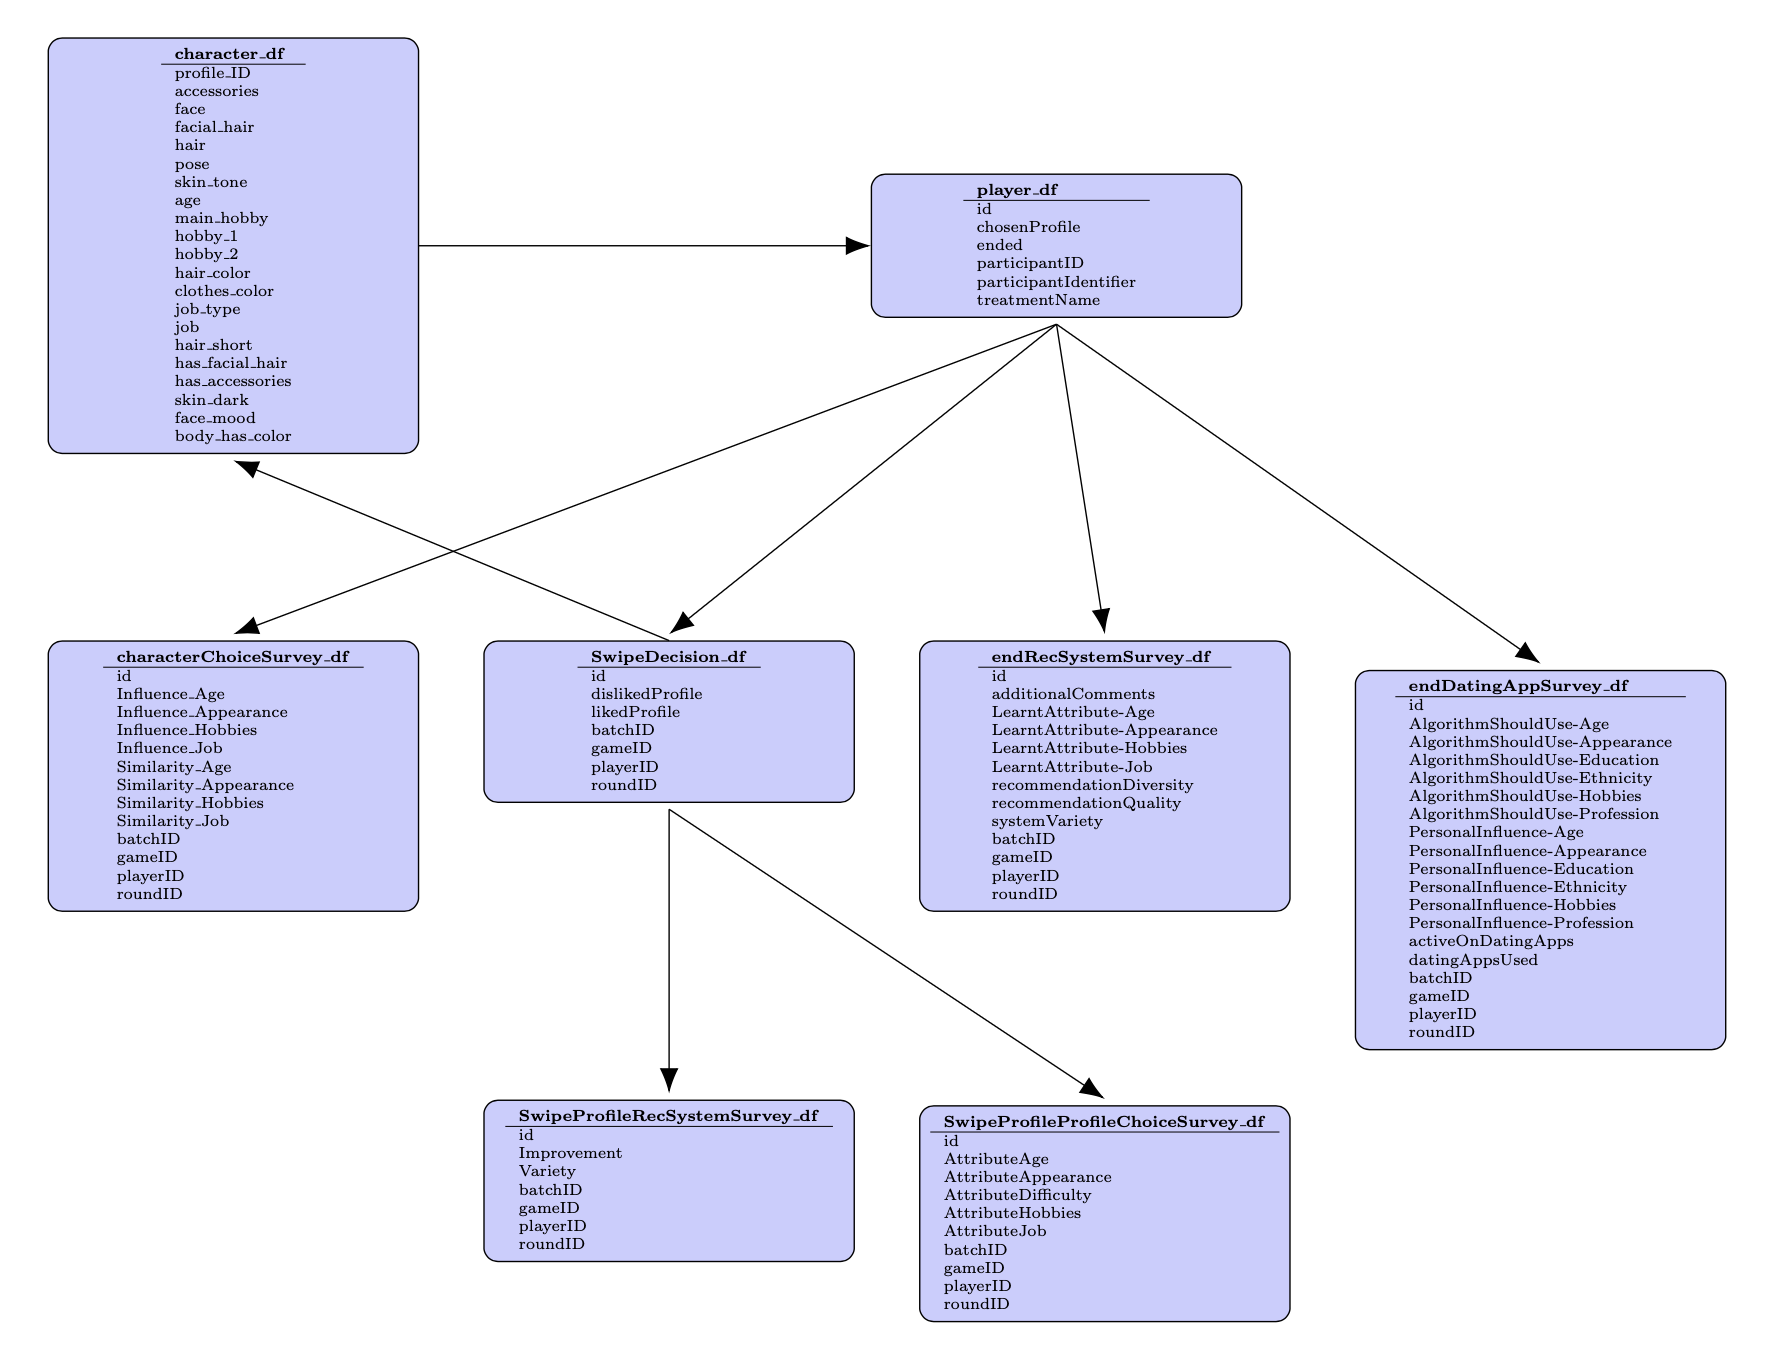

In [233]:
from IPython import display
display.Image("ER_Diagram.png")

## Testing different queries:

In [208]:
# Question: Average percentage of liked profiles with dark skintone by player:
liked_profiles_skin_dark = SwipeDecision_df.merge(character_df[["profile_ID", "skin_dark"]], left_on='likedProfile', right_on='profile_ID', how='left')[["skin_dark", "playerID"]]
liked_profiles_skin_dark.groupby("playerID").mean()

,skin_dark
playerID,
01J0V5BZZESP8VZP29RESGE02R,0.50
01J0V5RM6A1HGRKRSM10XVREGQ,0.54


In [209]:
# Question: When participant saw profile with light skin and profile with dark skin in the same round, 
# what was the percentage of them clicking on the light skin profile?

likedProfilesSkin = SwipeDecision_df[["likedProfile", "id"]].merge(character_df[["profile_ID", "skin_dark"]], left_on='likedProfile', right_on='profile_ID', how='left')[["skin_dark", "id"]]
dislikedProfilesSkin = SwipeDecision_df[["dislikedProfile", "id"]].merge(character_df[["profile_ID", "skin_dark"]], left_on='dislikedProfile', right_on='profile_ID', how='left')[["skin_dark", "id"]]
SwipeDecision_df["disliked_skin_dark"] = dislikedProfilesSkin["skin_dark"]
SwipeDecision_df["liked_skin_dark"] = likedProfilesSkin["skin_dark"]
SwipeDecision_df['different_skin'] = SwipeDecision_df["disliked_skin_dark"]==SwipeDecision_df["liked_skin_dark"]
percentage_df = SwipeDecision_df[SwipeDecision_df['different_skin'] == True].groupby('playerID').apply(
    lambda x: (x['liked_skin_dark'].sum() / len(x)) * 100
).reset_index(name='percentage_liked_skin_dark')
percentage_df

,playerID,percentage_liked_skin_dark
0,01J0V5BZZESP8VZP29RESGE02R,64.000000
1,01J0V5RM6A1HGRKRSM10XVREGQ,71.428571


In [210]:
# Question: How did the percentage of liked profiles which 